# Практическая работа «Кластеризация. Метод k-средних»

## Цель практической работы

- Научиться строить модель кластеризации на реальных данных.

## Что входит в работу


- Загрузить данные и провести разведочный анализ.
- Предположить оптимальное количество кластеров.
- Построить модель кластеризации с помощью  библиотеки scikit-learn.
- Вычислить оптимальное количество кластеров.
- Интерпретировать результаты.

## Что оценивается

*   Выполнены все этапы задания.
*   Сделаны выводы по результатам.

## Как отправить работу на проверку

Скачайте файл с заданием в материалах, откройте его через Jupyter Notebook и выполните задачи. Сохраните изменения при помощи опции Save and Checkpoint из вкладки меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (с расширением .ipynb) или ссылку на него.


## Задача

Пусть имеется набор данных `Mall_Customers.csv` о покупателях супермаркета:

* CustomerID — идентификатор покупателя;
* Genre — пол;
* Age — возраст;
* Annual Income (k$) — годовой доход покупателя в тыс. долл.;
* Spending Score (1–100) — рейтинг трат покупателя.

Решите задачу кластеризации покупателей, чтобы в дальнейшем планировать маркетинговые акции для каждой группы.

### Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других обнаруженных свойствах данных.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
df.shape

(200, 5)

In [22]:
# пропуски в данных отсутствуют

df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [23]:
df.Genre.value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

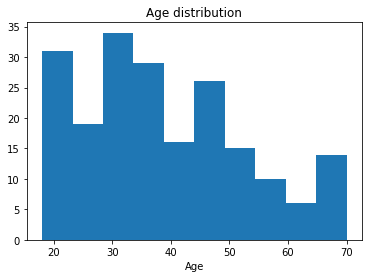

In [24]:
plt.hist(df.Age)
plt.title('Age distribution')
plt.xlabel('Age')
plt.show()

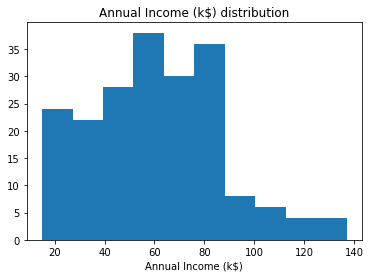

In [25]:
plt.hist(df['Annual Income (k$)'])
plt.title('Annual Income (k$) distribution')
plt.xlabel('Annual Income (k$)')
plt.show()

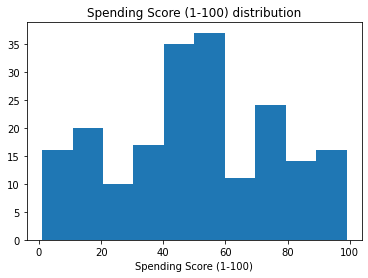

In [26]:
plt.hist(df['Spending Score (1-100)'])
plt.title('Spending Score (1-100) distribution')
plt.xlabel('Spending Score (1-100)')
plt.show()

Выбросов в данных не наблюдается

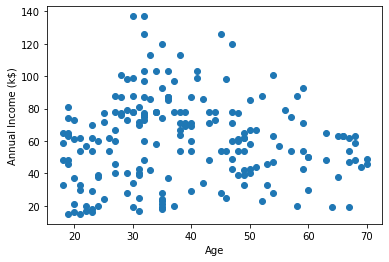

In [27]:
plt.scatter(df['Age'], df['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

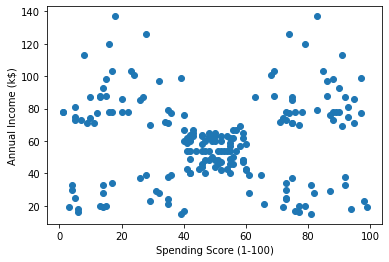

In [28]:
# на графике рассеяния рейтинга и ежегодного дохода можно выделить 5 кластеров

plt.scatter(df['Spending Score (1-100)'], df['Annual Income (k$)'])
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.show()

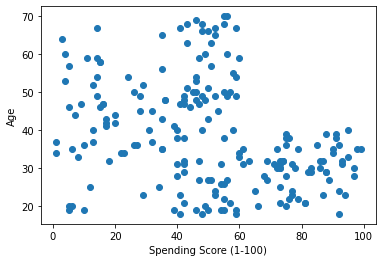

In [29]:
plt.scatter(df['Spending Score (1-100)'], df['Age'])
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Age')
plt.show()

### Задание 2

Метод k-средних требует явно задать количество кластеров, на которые будут разбиваться данные. Поскольку данных может быть настолько много, что построение одной модели будет занимать несколько часов, важно примерно оценить количество кластеров до запуска обучения модели.

На основе результатов разведочного анализа данных предположите, какое количество кластеров будет оптимальным, и аргументируйте предположение.

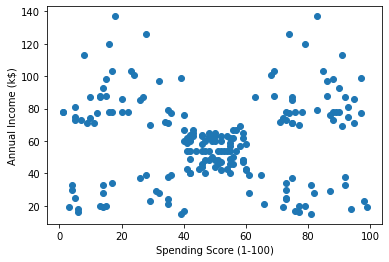

In [30]:
# на графике рассеяния рейтинга и ежегодного дохода можно выделить 5 кластеров

plt.scatter(df['Spending Score (1-100)'], df['Annual Income (k$)'])
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.show()

### Задание 3

Преобразуйте категориальный признак Genre в численный. Аргументируйте выбор метода кодирования признака.

In [31]:
# признак Genre имеет всего две категории
# их можно закодировать в 0 и 1

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, drop='first')

ft = ohe.fit_transform(df[['Genre']])
df['Genre'] = pd.DataFrame(ft, columns=['Genre'], index=df.index)

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1.0,19,15,39
1,2,1.0,21,15,81
2,3,0.0,20,16,6
3,4,0.0,23,16,77
4,5,0.0,31,17,40


### Задание 4

Постройте модель кластеризации с помощью метода k-средних. Определите оптимальное количество кластеров с помощью метода локтя.

In [45]:
# удалим столбец ID, поскольку он никак не описыват качества покупателя

df = df.drop(['CustomerID'], axis=1)

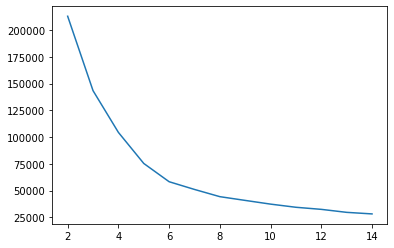

In [48]:
from sklearn.cluster import KMeans

n_clusters = list(range(2, 15))

metrics = []

for k in n_clusters:
    km = KMeans(n_clusters=k).fit(df)
    metrics.append(km.inertia_)

plt.plot(n_clusters, metrics)

### Задание 5

Постройте финальную модель кластеризации с количеством кластеров, опредёленным в предыдущем задании.

In [49]:
km = KMeans(n_clusters=6).fit(df)

### Задание 6 (выполните по желанию)

При работе с данными важно не только качество моделей машинного обучения, но и интерпретация полученных результатов и представление их в виде, понятном пользователям и заказчикам.

После построения модели кластеризации вы разбили покупателей на группы. Теперь важно интерпретировать эти группы, то есть создать профиль группы. 

В качестве профиля группы часто используют её типичного представителя. В кластерах типичным представителем можно назвать центроиду кластера. В sklearn получить список центроид можно с помощью атрибута `cluster_centers_` у объекта класса KMeans (этот атрибут возвращает матрицу с размерностями (количество кластеров, количество признаков), подробнее об этом [в материале](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)). 

Получите центроиды кластеров, преобразуйте их к датафрейму, опишите типичного представителя каждой группы и чем группы отличаются друг от друга. При описании и сравнении используйте методы визуализации.

In [50]:
pd.DataFrame(km.cluster_centers_, columns=df.columns)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0.461538,32.692308,86.538462,82.128205
1,0.571429,41.685714,88.228571,17.285714
2,0.342105,27.000000,56.657895,49.131579
3,0.380952,44.142857,25.142857,19.523810
4,0.444444,56.155556,53.377778,49.088889
5,0.409091,25.272727,25.727273,79.363636


In [ ]:
# 0 - возраст от 30 до 40 лет;    доход выше среднего;      рейтинг высокий
# 1 - возраст от 18 до 60 лет;    доход выше среднего;      рейтинг низкий
# 2 - возраст от 18 до 40 лет;    доход средний;            рейтинг средний
# 3 - возраст от 18 до 70 лет;    доход ниже среднего;      рейтинг низкий
# 4 - возраст от 40 до 70 лет;    доход средний;            рейтинг средний
# 5 - возраст от 18 до 40 лет;    доход ниже среднего;      рейтинг высокий

In [54]:
df['Annual Income (k$)'].mean()

60.56

In [55]:
df['Spending Score (1-100)'].mean()

50.2

In [57]:
df['labels'] = km.labels_

In [75]:
df[df['labels'] == 5].describe()

,Genre,Age,Annual Income (k$),Spending Score (1-100),labels
count,22.000000,22.000000,22.000000,22.000000,22.0
mean,0.409091,25.272727,25.727273,79.363636,5.0
std,0.503236,5.257030,7.566731,10.504174,0.0
min,0.000000,18.000000,15.000000,61.000000,5.0
25%,0.000000,21.250000,19.250000,73.000000,5.0
50%,0.000000,23.500000,24.500000,77.000000,5.0
75%,1.000000,29.750000,32.250000,85.750000,5.0
max,1.000000,35.000000,39.000000,99.000000,5.0
